In [4]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [5]:
env = BlackjackEnv()

In [6]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    # States never recur in blackjack thus First-Visit == Every-Visit

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(num_episodes):
        states_visited = []
        state = env.reset()
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            states_visited.append((state, reward))
            
            if done:
                break
            
            # Do this after the break otherwise we will get all
            # states where we go above 21 as well.
            state = next_state

        # In First-Visit MC we count the rewards starting from the first visit to the
        # state all the way until the end.
        for state, _ in states_visited:
            first_visit_idx = [i for i,s in enumerate(states_visited) if s[0] == state][0]
            returns_sum[state] += sum([r[1] * discount_factor ** i 
                                       for i,r in enumerate(states_visited[first_visit_idx:])])
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
    
    return V    

In [7]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

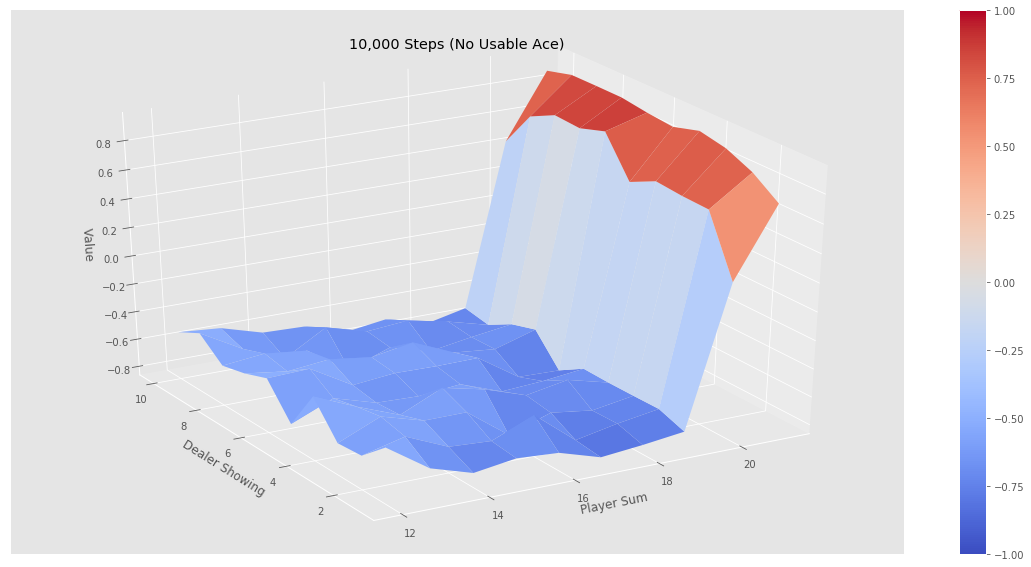

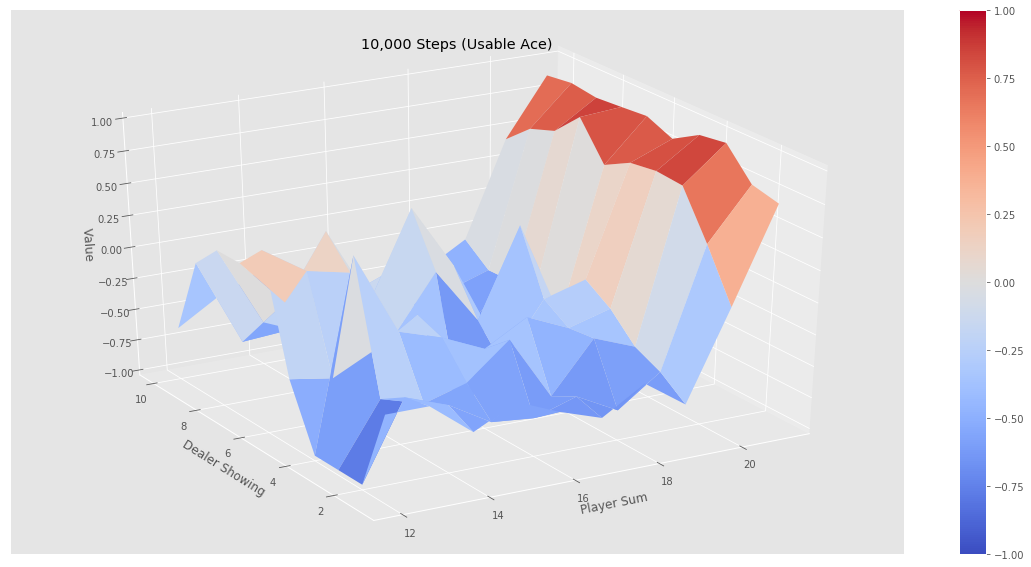

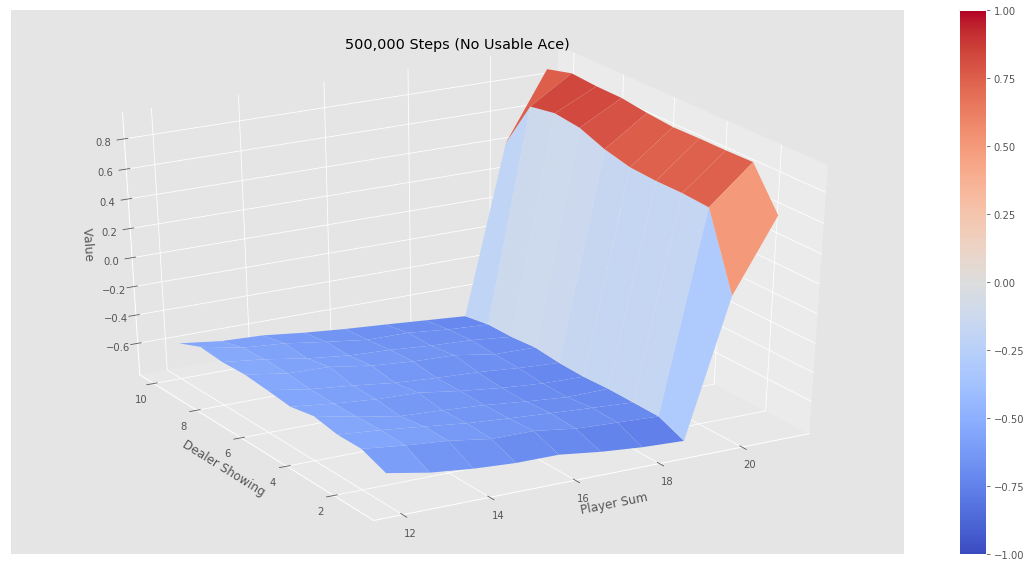

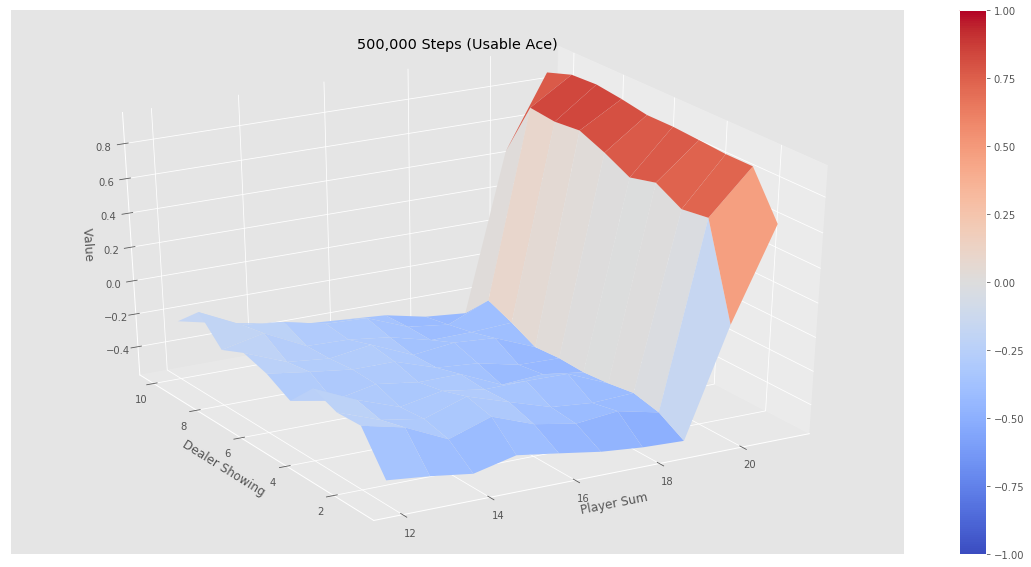

In [8]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")